In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor,  export_graphviz
%matplotlib inline 
sns.set(style="ticks")

data = pd.read_csv('D:\Институт\Семестр_6\ТМО_Гапанюк\лабы\heart.csv', sep=",")
data.head() # Первые 5 строк датасета

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [10]:
features = data.drop(['target'], axis=1)
target_tmp = data['target']
target = pd.DataFrame({'target':target_tmp.index, 'target':target_tmp.values})
features.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [17]:
from sklearn.model_selection import train_test_split
# Разделение выборки
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=1)
print ('{}, {}, {}, {}'.format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

(212, 13), (91, 13), (212, 1), (91, 1)


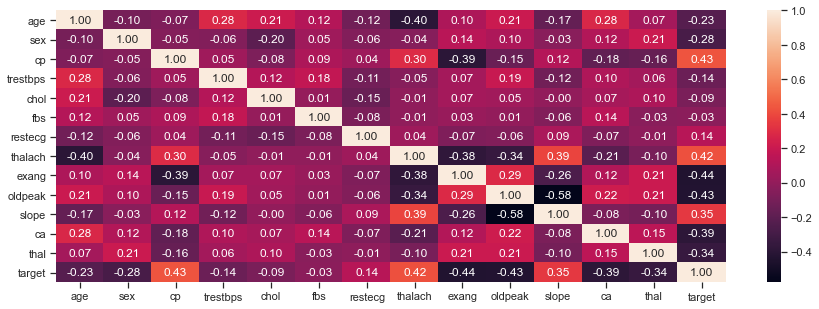

In [20]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

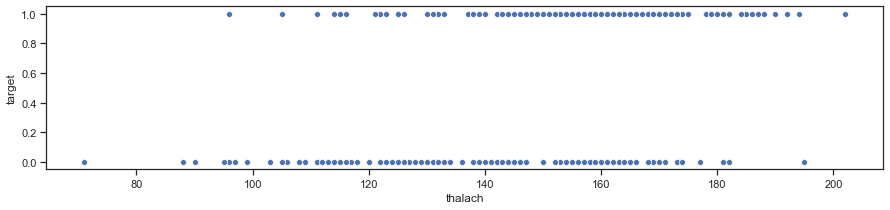

In [24]:
fig, ax = plt.subplots(figsize=(15,3)) 
sns.scatterplot(ax=ax, x='thalach', y='target', data=data)

In [27]:
res1 = Lasso(alpha=1).fit(X_train, Y_train)
predict1 = res1.predict(X_test)
predict1

array([0.57320972, 0.66259388, 0.5301149 , 0.43500001, 0.3703435 ,
       0.54516893, 0.14043595, 0.55718093, 0.44431344, 0.57781136,
       0.49681251, 0.50062312, 0.48904737, 0.33492717, 0.50575857,
       0.7346726 , 0.78332849, 0.4254093 , 0.7011132 , 0.57066272,
       0.42753904, 0.51638673, 0.50517638, 0.53511603, 0.69074674,
       0.78146616, 0.41829104, 0.76132259, 0.39318982, 0.652838  ,
       0.77428566, 0.68443607, 0.59858795, 0.55797544, 0.39347153,
       0.80537461, 0.46137301, 0.63308506, 0.66803227, 0.25355035,
       0.81014466, 0.37008526, 0.39319574, 0.36794492, 0.47428544,
       0.61147815, 0.42038201, 0.5434789 , 0.80036164, 0.34661674,
       0.84027294, 0.65164748, 0.38334086, 0.32011758, 0.62601837,
       0.63035932, 0.55047128, 0.40518896, 0.80154623, 0.2163312 ,
       0.49841316, 0.90415272, 0.68194316, 0.8251987 , 0.66006444,
       0.6343704 , 0.33187821, 0.59692608, 0.27023585, 0.30310814,
       0.44405715, 0.60989629, 0.15210847, 0.56345976, 0.24732

In [28]:
Y_test['target'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [51]:
accuracy_score(Y_test, predict1.round())

0.6483516483516484

In [31]:
precision_score(Y_test, predict1.round())

0.6730769230769231

In [35]:
res2 = LinearSVC(C=1, penalty='l1', dual=False, max_iter=10000).fit(X_train, Y_train)
predict2 = res2.predict(X_test)
predict2

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [36]:
Y_test['target'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [45]:
accuracy_score(Y_test, predict2)

0.7802197802197802

In [46]:
precision_score(Y_test, predict2)

0.7777777777777778

In [41]:
res3 = DecisionTreeRegressor().fit(X_train, Y_train)
predict3 = res3.predict(X_test)
predict3

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1.])

In [42]:
Y_test['target'].values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [48]:
accuracy_score(Y_test, predict3)

0.7472527472527473

In [49]:
precision_score(Y_test, predict3)

0.8